In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.options.display.max_seq_items = 2000
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import requests, re
import nltk
import string, itertools
from collections import Counter, defaultdict
# from nltk.text import Text
# from nltk.probability import FreqDist
# from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer, WordNetLemmatizer
# from gensim.corpora.dictionary import Dictionary
# from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
import wordcloud

In [2]:
import json
import pandas as pd
data_file_1 = open("../data/yelp_academic_dataset_business.json")
data_1 = []
for line in data_file_1:
    data_1.append(json.loads(line))
business = pd.DataFrame(data_1)
data_file_1.close()

In [3]:
## drop unuseful column 'hours','attributes'
business.drop(['hours','attributes'], axis=1, inplace=True)

## remove quotation marks in name and address column
business.name=business.name.str.replace('"','')
business.address=business.address.str.replace('"','')#把引号去掉

## 按洲名简写筛选数据，
## 并存入新的dataframe：use
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
usa=business.loc[business['state'].isin(states)] #把不是美国州的去掉
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


In [4]:
usa=usa.dropna(axis=0, subset=['categories'])

In [5]:
## 选出所有餐厅，
## 并存入新的dataframe：us_restaurants
us_restaurants=usa[usa['categories'].str.contains('Restaurants')]

## select out 16 cuisine types of restaurants and rename the category
## 把 us_restaurants['category'] 中含有指定种类的餐厅筛选出来，
## 并新建column：'category'

# us_restaurants.is_copy=False 版本过老
us_restaurants['category']=pd.Series()
us_restaurants.loc[us_restaurants.categories.str.contains('American'),'category'] = 'American'
us_restaurants.loc[us_restaurants.categories.str.contains('Mexican'), 'category'] = 'Mexican'
us_restaurants.loc[us_restaurants.categories.str.contains('Italian'), 'category'] = 'Italian'
us_restaurants.loc[us_restaurants.categories.str.contains('Japanese'), 'category'] = 'Japanese'
us_restaurants.loc[us_restaurants.categories.str.contains('Chinese'), 'category'] = 'Chinese'
us_restaurants.loc[us_restaurants.categories.str.contains('Thai'), 'category'] = 'Thai'
us_restaurants.loc[us_restaurants.categories.str.contains('Mediterranean'), 'category'] = 'Mediterranean'
us_restaurants.loc[us_restaurants.categories.str.contains('French'), 'category'] = 'French'
us_restaurants.loc[us_restaurants.categories.str.contains('Vietnamese'), 'category'] = 'Vietnamese'
us_restaurants.loc[us_restaurants.categories.str.contains('Greek'),'category'] = 'Greek'
us_restaurants.loc[us_restaurants.categories.str.contains('Indian'),'category'] = 'Indian'
us_restaurants.loc[us_restaurants.categories.str.contains('Korean'),'category'] = 'Korean'
us_restaurants.loc[us_restaurants.categories.str.contains('Hawaiian'),'category'] = 'Hawaiian'
us_restaurants.loc[us_restaurants.categories.str.contains('African'),'category'] = 'African'
us_restaurants.loc[us_restaurants.categories.str.contains('Spanish'),'category'] = 'Spanish'
us_restaurants.loc[us_restaurants.categories.str.contains('Middle_eastern'),'category'] = 'Middle_eastern'
us_restaurants[:20]

/var/folders/2s/l91lc7n15_v8ttwq_5b399f40000gn/T/ipykernel_1702/3096763070.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  us_restaurants['category']=pd.Series()
/var/folders/2s/l91lc7n15_v8ttwq_5b399f40000gn/T/ipykernel_1702/3096763070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_restaurants['category']=pd.Series()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,category
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"Pubs, Restaurants, Italian, Bars, American (Tr...",Greek
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",NaN
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"Vietnamese, Food, Restaurants, Food Trucks",Vietnamese
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"American (Traditional), Restaurants, Diners, B...",American
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"Food, Delis, Italian, Bakeries, Restaurants",Italian
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"Sushi Bars, Restaurants, Japanese",Japanese
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"Korean, Restaurants",Korean
22,kfNv-JZpuN6TVNSO6hHdkw,Hibachi Express,6625 E 82nd St,Indianapolis,IN,46250,39.904320,-86.053080,4.0,20,1,"Steakhouses, Asian Fusion, Restaurants",NaN


In [6]:
## drop null values in category, 
us_restaurants=us_restaurants.dropna(axis=0, subset=['category'])

## delete original column categories 
del us_restaurants['categories']

## and reset the index
us_restaurants=us_restaurants.reset_index(drop=True)
us_restaurants.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,Greek
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,Vietnamese
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,American
3,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,Italian
4,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,Japanese
5,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,Korean
6,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,NV,89502,39.476117,-119.789339,2.5,339,1,Italian
7,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,Japanese
8,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,Italian
9,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,American


In [7]:
## load review table

# review.head()
import json
import pandas as pd
review = pd.read_csv('yelp_reviews_3.csv')

In [8]:
## 以 'business_id' 为准合并两个df，得到 “restaurants_reviews”
restaurants_reviews = pd.merge(us_restaurants, review, on = 'business_id')
restaurants_reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category,text,labels
0,Dtuf4vD0znzwJW9vk3iTNw,Tomo Japanese Steakhouse and Sushi Bar,"7411 N Keystone Ave, Ste A",Indianapolis,IN,46240,39.888725,-86.121213,4.0,246,1,Japanese,i can only speak for the lunch special which i...,positive
1,dJfkfBbJz7wi0RgW-ph_Eg,Sake House,5106 E Fowler Ave,Tampa,FL,33617,28.055212,-82.399374,3.0,140,0,Japanese,we've been visiting sake house fairly regularl...,negative
2,dJfkfBbJz7wi0RgW-ph_Eg,Sake House,5106 E Fowler Ave,Tampa,FL,33617,28.055212,-82.399374,3.0,140,0,Japanese,i went to have dinner with my friend and 2 you...,negative
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.250960,-110.959158,4.0,446,1,Indian,having enjoyed lunches and dinners at sherepun...,negative
4,VeqkfRUzZAKlQer3npXPdQ,New India's Kitchen,14222 Manchester Rd,Ballwin,MO,63011,38.592057,-90.503565,4.0,130,0,Indian,this is the best indian lunch buffet in stl th...,positive


In [9]:
## 更新 column names
#restaurants_reviews.rename(columns={'stars_x':'avg_star','stars_y':'review_star'}, inplace=True)

## 把评论中所有的：特殊符号和换行符 全部用空格替换，然后计算每个评论的字数并存入 'num_words_review'
#restaurants_reviews['text'] = restaurants_reviews.text.str.replace('\n','').str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','').map(lambda x: len(x.split()))

# 根据星级，对评论 label reviews as positive or negative
#restaurants_reviews['labels'] = ''
#restaurants_reviews.loc[restaurants_reviews.review_star >=4, 'labels'] = 'positive'
#restaurants_reviews.loc[restaurants_reviews.review_star ==3, 'labels'] = 'neural'
#restaurants_reviews.loc[restaurants_reviews.review_star <3, 'labels'] = 'negative'

# drop neutral reviews for easy analysis
#restaurants_reviews.drop(restaurants_reviews[restaurants_reviews['labels'] =='neural'].index, axis=0, inplace=True)
restaurants_reviews.reset_index(drop=True, inplace=True)

In [10]:
restaurants_reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category,text,labels
0,Dtuf4vD0znzwJW9vk3iTNw,Tomo Japanese Steakhouse and Sushi Bar,"7411 N Keystone Ave, Ste A",Indianapolis,IN,46240,39.888725,-86.121213,4.0,246,1,Japanese,i can only speak for the lunch special which i...,positive
1,dJfkfBbJz7wi0RgW-ph_Eg,Sake House,5106 E Fowler Ave,Tampa,FL,33617,28.055212,-82.399374,3.0,140,0,Japanese,we've been visiting sake house fairly regularl...,negative
2,dJfkfBbJz7wi0RgW-ph_Eg,Sake House,5106 E Fowler Ave,Tampa,FL,33617,28.055212,-82.399374,3.0,140,0,Japanese,i went to have dinner with my friend and 2 you...,negative
3,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719,32.250960,-110.959158,4.0,446,1,Indian,having enjoyed lunches and dinners at sherepun...,negative
4,VeqkfRUzZAKlQer3npXPdQ,New India's Kitchen,14222 Manchester Rd,Ballwin,MO,63011,38.592057,-90.503565,4.0,130,0,Indian,this is the best indian lunch buffet in stl th...,positive


In [11]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
pd.set_option('display.float_format', lambda x: '%.4f' % x)


## convert text to lower case 全部转化为小写
#restaurants_reviews.text = restaurants_reviews.text.str.lower()

## remove unnecessary punctuation（又重复操作了一遍）
#restaurants_reviews['removed_punct_text']= restaurants_reviews.text.str.replace('\n','').str.replace('[!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~]','')

# ## 将 positive file 导入 list：positive_words中
# file_positive = open('/Users/houdeliao/Desktop/positive.txt')
# reader =csv.reader(file_positive)
# positive_words = [word[0] for word in reader]


import sys
positive_words=[]
with open('../data/positive.txt','r') as p:
    for pline in p:
        positive_words.append(pline.strip('\n'))



## 将 negative file 导入 list：negative_words中
file_negative = open('../data/negative2.txt')
reader =csv.reader(file_negative)
negative_words = [word[0] for word in reader]


# negative_words=[]
# with open('/Users/houdeliao/Desktop/negative.txt','r') as n:
#     for nline in n:
#         negative_words.append(nline.strip('\n'))
# print(negative_words)


In [12]:
"""
创立函数
"""
## get dataset by category
def get_dataset(category):
    df = restaurants_reviews[['text','labels']][restaurants_reviews.category==category]
    df.reset_index(drop=True, inplace =True)
    #df.rename(columns={'removed_punct_text':'text'}, inplace=True)
    return df

In [13]:
## only keep positive and negative words
def filter_words(review):
    words = [word for word in review.split() if word in positive_words + negative_words]
    words = ' '.join(words)
    return words


In [14]:
## 得到重要性评分
def get_polarity_score(dataset):
    dataset.text = dataset.text.apply(filter_words)
    
    terms_train=list(dataset['text'])
    class_train=list(dataset['labels'])
    
    ## get bag of words
    vectorizer = CountVectorizer()
    feature_train_counts=vectorizer.fit_transform(terms_train)
    
    ## run model
    svm = LinearSVC()
    svm.fit(feature_train_counts, class_train)
#     print(class_train)
    
    ## create dataframe for score of each word in a review calculated by svm model
    coeff = svm.coef_[0]
    cuisine_words_score = pd.DataFrame({'score': coeff, 'word': vectorizer.get_feature_names()})
#     print(cuisine_words_score)
    
    ## get frequency of each word in all reviews in specific category
    cuisine_reviews = pd.DataFrame(feature_train_counts.toarray(), columns=vectorizer.get_feature_names())
    cuisine_reviews['labels'] = class_train
    cuisine_frequency = cuisine_reviews[cuisine_reviews['labels'] =='positive'].sum()[:-1]
    
    cuisine_words_score.set_index('word', inplace=True)
    cuisine_polarity_score = cuisine_words_score
    cuisine_polarity_score['frequency'] = cuisine_frequency
    
    cuisine_polarity_score.score = cuisine_polarity_score.score.astype(float)
    cuisine_polarity_score.frequency = cuisine_polarity_score.frequency.astype(int)
    
    ## calculate polarity score 
    cuisine_polarity_score['polarity'] = cuisine_polarity_score.score * cuisine_polarity_score.frequency / cuisine_reviews.shape[0]
    
    cuisine_polarity_score.polarity = cuisine_polarity_score.polarity.astype(float)
    ## drop unnecessary words
    unuseful_positive_words = ['great','amazing','love','best','awesome','excellent','good',
                                                   'favorite','loved','perfect','gem','perfectly','wonderful',
                                                    'happy','enjoyed','nice','well','super','like','better','decent','fine',
                                                    'pretty','enough','excited','impressed','ready','fantastic','glad','right',
                                                    'fabulous','liked','incredible','outstanding','positive']
    unuseful_negative_words =  ['bad','disappointed','disappointing','horrible','disappoint','lacking','unfortunately','sorry']
    unuseful_words = unuseful_positive_words + unuseful_negative_words
#     print(cuisine_polarity_score)
    for word in cuisine_polarity_score.index:
        if word in unuseful_words:
            cuisine_polarity_score.drop(word, axis=0, inplace=True)
            
    #cuisine_polarity_score.drop(cuisine_polarity_score.loc[unuseful_words].index, axis=0, inplace=True)
    
    return cuisine_polarity_score,vectorizer,svm

In [15]:
def get_top_words(dataset, label, number=20):
    if label == 'positive':
        df = dataset[dataset.polarity>0].sort_values('polarity',ascending = False)[:number]
    else:
        df = dataset[dataset.polarity<0].sort_values('polarity')[:number]
    return df


In [16]:
def split_data(dataset, test_size):
    df_train, df_test = train_test_split(dataset[['text','labels']],test_size=test_size)
    return df_train,df_test

In [17]:
from sklearn.metrics import accuracy_score
def test_data(dataset,transform,model):
    x_test=list(dataset['text'])
    y_test=list(dataset['labels'])
    
    ## get bag of words
    feature_train_counts=transform.transform(x_test)
    y_predict=model.predict(feature_train_counts)
    
    score=accuracy_score(y_predict,y_test)
    
    return score
    

In [36]:
Japanese_reviews = get_dataset('Japanese')
Japanese_train,Japanese_test = split_data(Japanese_reviews, 0.9)
#print('Total %d number of reviews' % Japanese_train.shape[0])
# print(Japanese_reviews)

Japanese_polarity_score,vectorizer_Jap,svm_Jap = get_polarity_score(Japanese_train)
get_top_words(Japanese_polarity_score, 'positive',20)

get_top_words(Japanese_polarity_score,'negative',20)

Japanese_test_score=test_data(Japanese_test,vectorizer_Jap,svm_Jap)


print(Japanese_test_score)

# Analysis on Cusine Type

In [18]:
cusine_type = set(restaurants_reviews['category'])

In [20]:
cusine_words = {}
cusine_score = {}
for cusine in cusine_type:
    reviews = get_dataset(cusine)
    train,test = split_data(reviews, 0.9)
    polarity_score,vectorizer,svm= get_polarity_score(train)
    words = get_top_words(polarity_score, 'positive',20)
    cusine_words[cusine] = list(words.index)
    cusine_score[cusine] = list(words['polarity'])

/Users/lyric/opt/anaconda3/envs/mlsys/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/lyric/opt/anaconda3/envs/mlsys/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/lyric/opt/anaconda3/envs/mlsys/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/lyric/opt/anaconda3/envs/mlsys/lib/python3.9/site-packages/skle

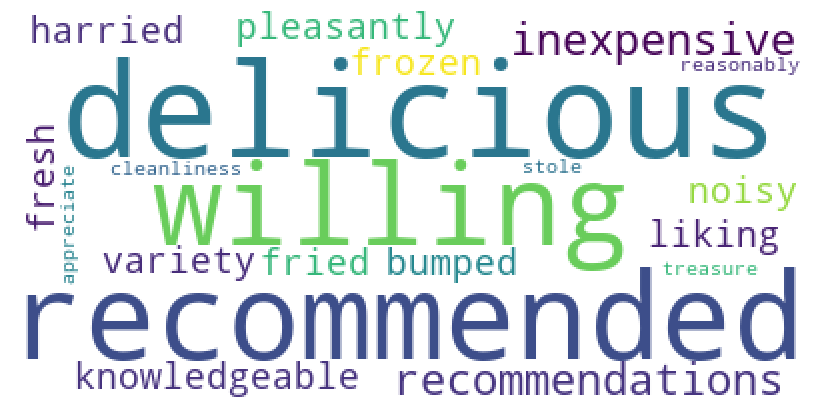

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cusine = 'Japanese'
text = ' '.join(cusine_words[cusine])
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [35]:
import pickle
with open('../data/cusine_words','wb') as f:
    pickle.dump(cusine_words, f)

In [36]:
with open('../data/cusine_words','rb') as f:
    tmp = pickle.load(f)

In [37]:
tmp

{'Chinese': ['fried',
  'delicious',
  'friendly',
  'hot',
  'attentive',
  'fall',
  'bomb',
  'unbearable',
  'fresh',
  'clean',
  'free',
  'advantage',
  'humid',
  'speedy',
  'guarantee',
  'sour',
  'trouble',
  'ruined',
  'smell',
  'reputation'],
 'Mexican': ['delicious',
  'thank',
  'authentic',
  'seasoned',
  'friendly',
  'divine',
  'creative',
  'topnotch',
  'charming',
  'pricey',
  'worth',
  'hate',
  'cozy',
  'appreciated',
  'intimate',
  'daring',
  'fresh',
  'healthy',
  'chic',
  'stuffy'],
 'Greek': ['fast',
  'fresh',
  'killer',
  'pricey',
  'die',
  'recommend',
  'reasonably',
  'picky',
  'support',
  'friendly',
  'pride',
  'hot',
  'delicious',
  'uncertain',
  'attentive',
  'lame',
  'hard',
  'funny',
  'flaky',
  'delighted'],
 'Mediterranean': ['recommend',
  'attentive',
  'delicious',
  'reasonable',
  'warning',
  'fair',
  'friendly',
  'promptly',
  'fancy',
  'sick',
  'inconsistent',
  'fairly',
  'uncomfortable',
  'mistakes',
  'lim